<a href="https://colab.research.google.com/github/nabdeep-patel/flare-cme-association/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sunpy[all] lime

from IPython.display import clear_output
clear_output()

In [2]:
import numpy as np
import pandas as pd

In [3]:
positive = pd.read_csv('/workspaces/flare-cme-association/2018/positive_2018.csv')
positive["CME"] = 1
negative = pd.read_csv('/workspaces/flare-cme-association/2018/negative_2018.csv')
negative["CME"] = 0

In [4]:
data = pd.concat([positive, negative], ignore_index=True)

In [5]:
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA_ARS,GOES_Class,Peak_Time,CME
0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,117.582,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,99.163,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,100.010,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,110.939,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,115.866,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,5.405734e+22,96.225,-0.040161,17940.450,40.353,6883.232,63.221,-0.057003,47.062,110.593,...,1.584434e+24,41.244,1767.386841,5.134,2670.696,7115,12673,M1.3,2017.09.07_02:24_TAI,0
441,5.613295e+22,93.027,-0.038322,15304.870,35.437,5842.066,57.352,-0.061129,45.110,106.716,...,1.433866e+24,39.519,1905.817749,5.048,2703.341,7115,12673,M2.9,2017.09.07_15:47_TAI,0
442,5.941742e+22,85.360,-0.023854,12979.840,31.876,5518.212,52.930,-0.039883,42.963,98.952,...,1.299920e+24,37.017,1836.984009,4.914,1798.802,7115,12673,M2.1,2017.09.07_23:45_TAI,0
443,5.996130e+22,88.774,-0.020632,13169.540,30.936,5637.013,54.109,-0.033380,42.638,104.543,...,1.289169e+24,36.550,1864.373535,4.874,1520.726,7115,12673,M1.1,2017.09.08_04:28_TAI,0


## Plotting histograms to see the variability of the data

In [6]:
data = data.drop(['HARPNUM','NOAA_ARS','GOES_Class','Peak_Time'], axis=1)

In [7]:
X = data.drop(columns=['CME'])
y = data['CME']

In [8]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [9]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.110342,0.555340,0.690394,0.605487,0.871939,0.204824,0.796086,0.678962,0.937815,0.565928,0.416585,0.202952,0.114476,0.133011,0.900055,0.128267,0.875866,0.193364,1
1,0.109806,0.389146,0.507880,0.415653,0.699841,0.109642,0.476976,0.462796,0.712539,0.353911,0.440602,0.132131,0.028793,0.088537,0.712075,0.130544,0.784360,0.015724,1
2,0.304362,0.357640,0.580972,0.374485,0.456517,0.294006,0.371139,0.553205,0.470255,0.363660,0.194188,0.311960,0.339951,0.202599,0.503348,0.267394,0.886803,0.159422,1
3,0.117444,0.578940,0.597047,0.119330,0.206602,0.100299,0.341865,0.628887,0.296639,0.489462,0.322072,0.123382,0.190494,0.034370,0.301701,0.131817,0.723843,0.094947,1
4,0.097242,0.581156,0.776187,0.462856,0.698426,0.174382,0.731767,0.862225,0.778385,0.546176,0.621194,0.172255,0.445302,0.098705,0.724424,0.172403,0.870762,0.280703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.271956,0.417442,0.213141,0.704424,0.638343,0.482753,0.575382,0.209905,0.620557,0.485479,0.047374,0.350869,0.731956,0.299384,0.650741,0.243896,0.935837,0.694986,0
441,0.282572,0.379131,0.227327,0.596107,0.559304,0.408709,0.487636,0.190241,0.570931,0.440852,0.164147,0.335137,0.757328,0.270811,0.603403,0.263368,0.920160,0.703491,0
442,0.299372,0.287284,0.338900,0.500553,0.502050,0.385678,0.421523,0.291498,0.516347,0.351482,0.251848,0.323745,0.452708,0.245392,0.534742,0.253686,0.895735,0.467834,0
443,0.302154,0.328182,0.363751,0.508349,0.486937,0.394127,0.439150,0.322492,0.508085,0.415839,0.203624,0.325867,0.373499,0.243351,0.521926,0.257538,0.888443,0.395387,0


In [10]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [11]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)

[0.76631031 4.00778874 0.12249341 0.11516693 0.1394834  1.62234857
 2.61456344 0.05029789 0.00916804 5.50978105 0.13515373 1.49327927
 6.63264813 1.36102288 0.04588905 1.17024989 0.38451318 6.33546641]


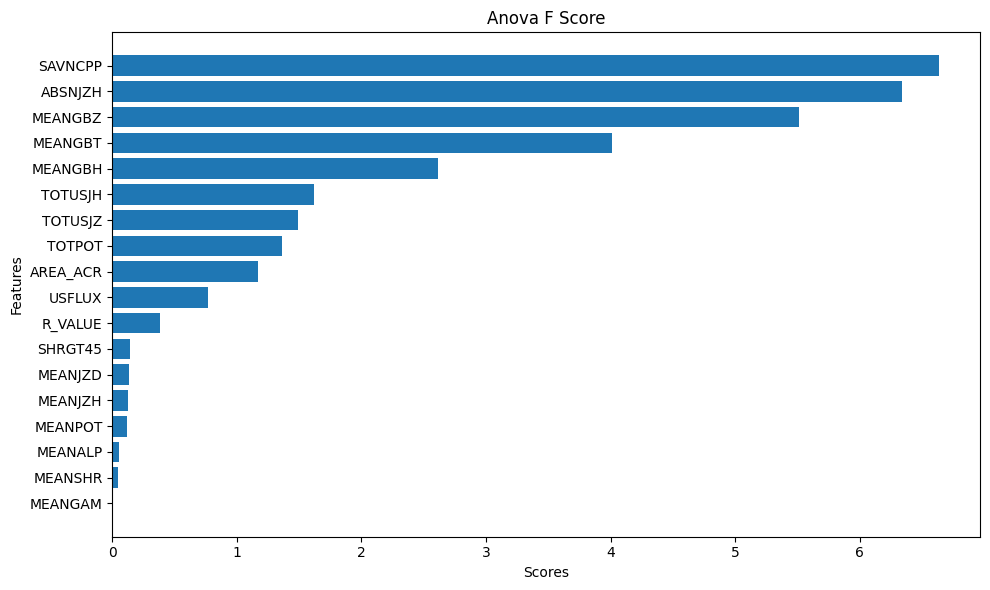

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [13]:
ordered_columns=['SAVNCPP','ABSNJZH','MEANGBZ',"MEANGBT",'MEANGBH','TOTUSJH','TOTUSJZ','TOTPOT','AREA_ACR','USFLUX','R_VALUE','SHRGT45',
                 'MEANJZD', 'MEANJZH','MEANPOT','MEANALP','MEANSHR','MEANGAM','CME']
df_reordered = df.loc[:, ordered_columns]

In [14]:
df_reordered

,SAVNCPP,ABSNJZH,MEANGBZ,MEANGBT,MEANGBH,TOTUSJH,TOTUSJZ,TOTPOT,AREA_ACR,USFLUX,R_VALUE,SHRGT45,MEANJZD,MEANJZH,MEANPOT,MEANALP,MEANSHR,MEANGAM,CME
0,0.114476,0.193364,0.565928,0.555340,0.796086,0.204824,0.202952,0.133011,0.128267,0.110342,0.875866,0.871939,0.416585,0.690394,0.605487,0.678962,0.900055,0.937815,1
1,0.028793,0.015724,0.353911,0.389146,0.476976,0.109642,0.132131,0.088537,0.130544,0.109806,0.784360,0.699841,0.440602,0.507880,0.415653,0.462796,0.712075,0.712539,1
2,0.339951,0.159422,0.363660,0.357640,0.371139,0.294006,0.311960,0.202599,0.267394,0.304362,0.886803,0.456517,0.194188,0.580972,0.374485,0.553205,0.503348,0.470255,1
3,0.190494,0.094947,0.489462,0.578940,0.341865,0.100299,0.123382,0.034370,0.131817,0.117444,0.723843,0.206602,0.322072,0.597047,0.119330,0.628887,0.301701,0.296639,1
4,0.445302,0.280703,0.546176,0.581156,0.731767,0.174382,0.172255,0.098705,0.172403,0.097242,0.870762,0.698426,0.621194,0.776187,0.462856,0.862225,0.724424,0.778385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.731956,0.694986,0.485479,0.417442,0.575382,0.482753,0.350869,0.299384,0.243896,0.271956,0.935837,0.638343,0.047374,0.213141,0.704424,0.209905,0.650741,0.620557,0
441,0.757328,0.703491,0.440852,0.379131,0.487636,0.408709,0.335137,0.270811,0.263368,0.282572,0.920160,0.559304,0.164147,0.227327,0.596107,0.190241,0.603403,0.570931,0
442,0.452708,0.467834,0.351482,0.287284,0.421523,0.385678,0.323745,0.245392,0.253686,0.299372,0.895735,0.502050,0.251848,0.338900,0.500553,0.291498,0.534742,0.516347,0
443,0.373499,0.395387,0.415839,0.328182,0.439150,0.394127,0.325867,0.243351,0.257538,0.302154,0.888443,0.486937,0.203624,0.363751,0.508349,0.322492,0.521926,0.508085,0


In [15]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [16]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

/tmp/ipykernel_17061/2878712047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
/tmp/ipykernel_17061/2878712047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


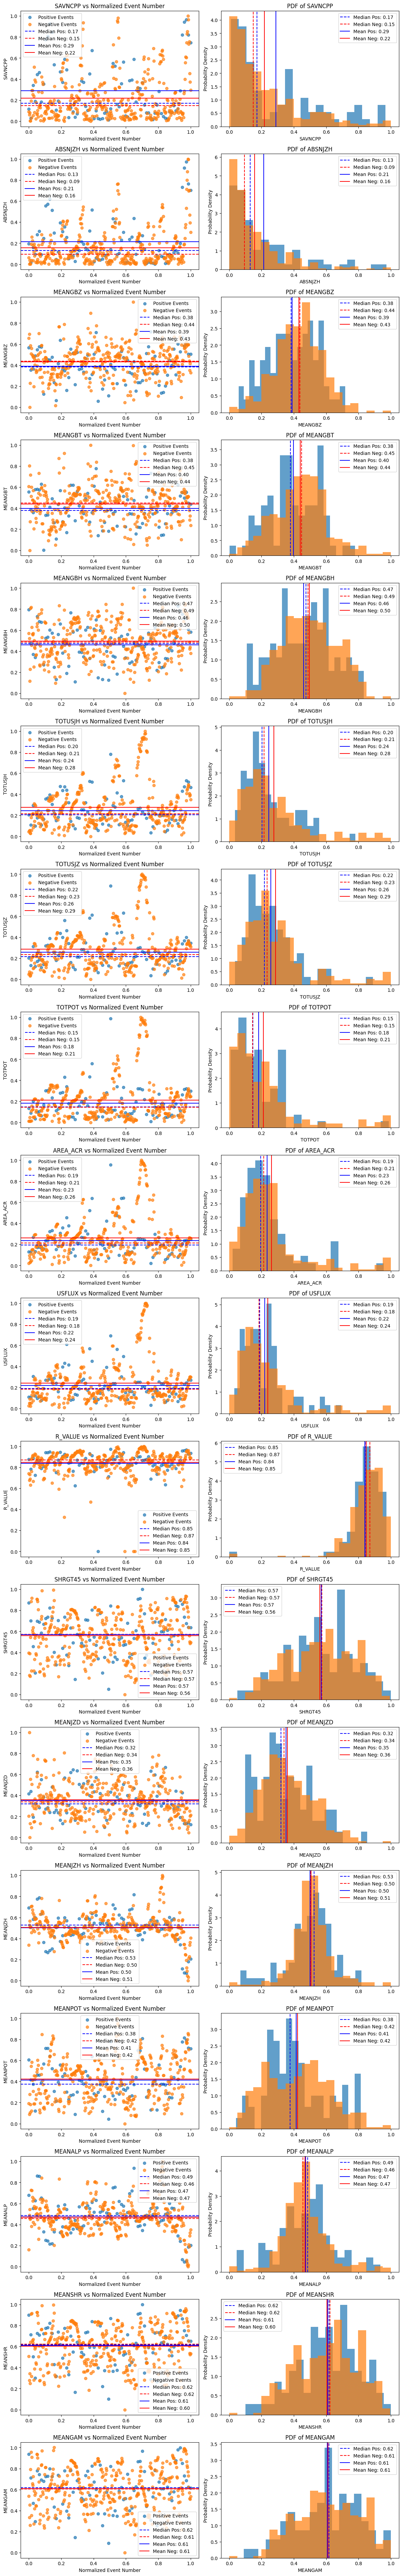

<Figure size 640x480 with 0 Axes>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    median_pos = np.median(pos.iloc[:, i])
    median_neg = np.median(neg.iloc[:, i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive Events")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative Events")
    plt.axhline(median_pos, color='b',linestyle='dashed', label=f"Median Pos: {median_pos:.2f}")
    plt.axhline(median_neg, color='r',linestyle='dashed', label=f"Median Neg: {median_neg:.2f}")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_columns[i])
    plt.title(f"{ordered_columns[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(median_pos, color='b',linestyle='dashed', label=f"Median Pos: {median_pos:.2f}")
    plt.axvline(median_neg, color='r',linestyle='dashed', label=f"Median Neg: {median_neg:.2f}")
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel(ordered_columns[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_columns[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.show()
plt.savefig("2024_parameters_pdf.jpeg")